# Linear Regression CaseStudy

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

## Predicting the Yearly amount spent Insurance costs

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
customers = pd.read_csv(r"C:\Users\Ali\Downloads\Ecommerce Customers.csv")

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# For both numerical and categorical variables
customers.describe(include="all")

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,marc54@hotmail.com,Unit 7029 Box 3429\nDPO AE 56975,CadetBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Exploratory Data Analysis

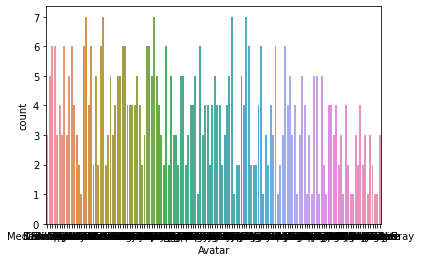

In [9]:
sns.countplot(customers['Avatar'])

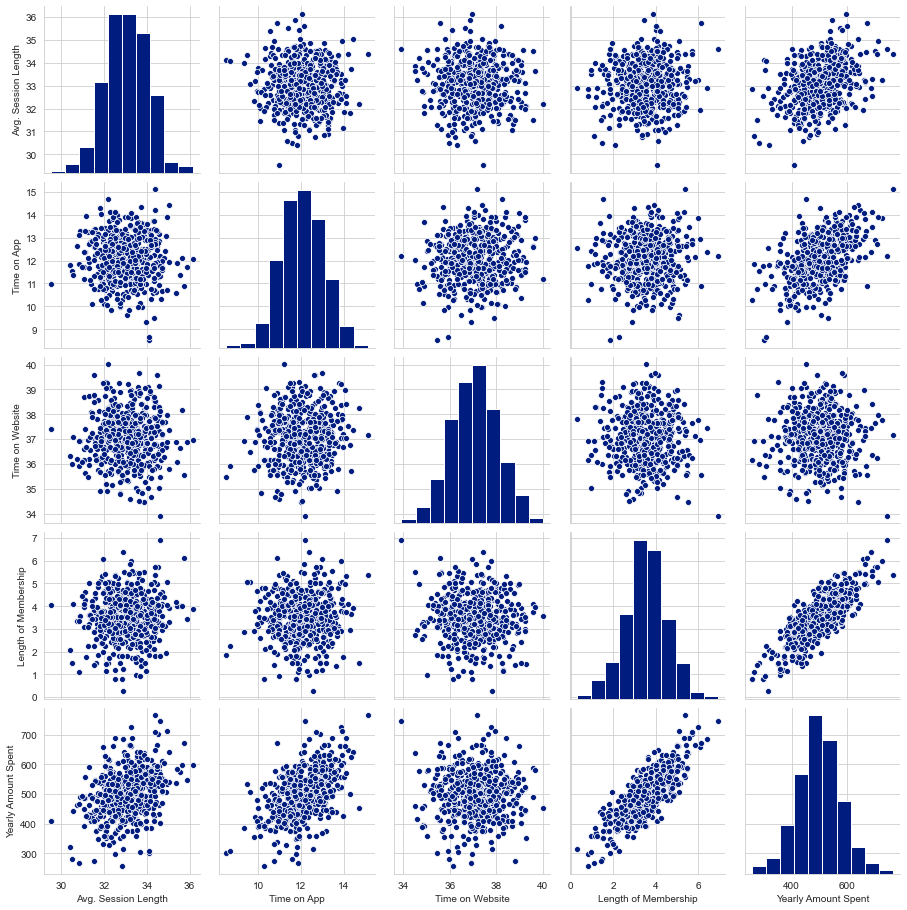

In [10]:
sns.set_palette("dark")
sns.set_style('whitegrid')
sns.pairplot(customers)
plt.show()

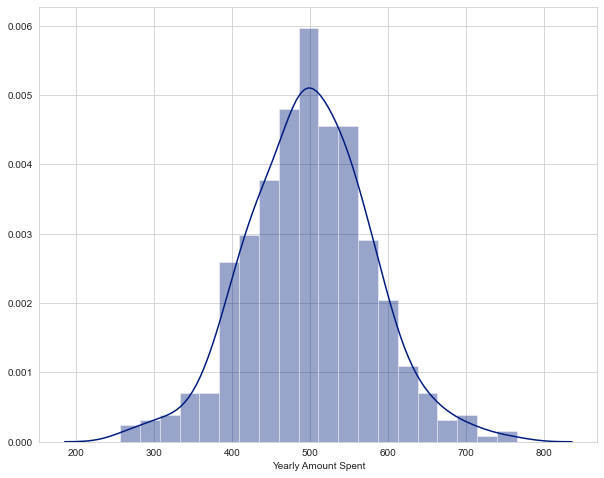

In [11]:
# Density distribution for target variable
plt.figure(figsize=(10,8))
sns.distplot(customers['Yearly Amount Spent'])
plt.show()

In [12]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


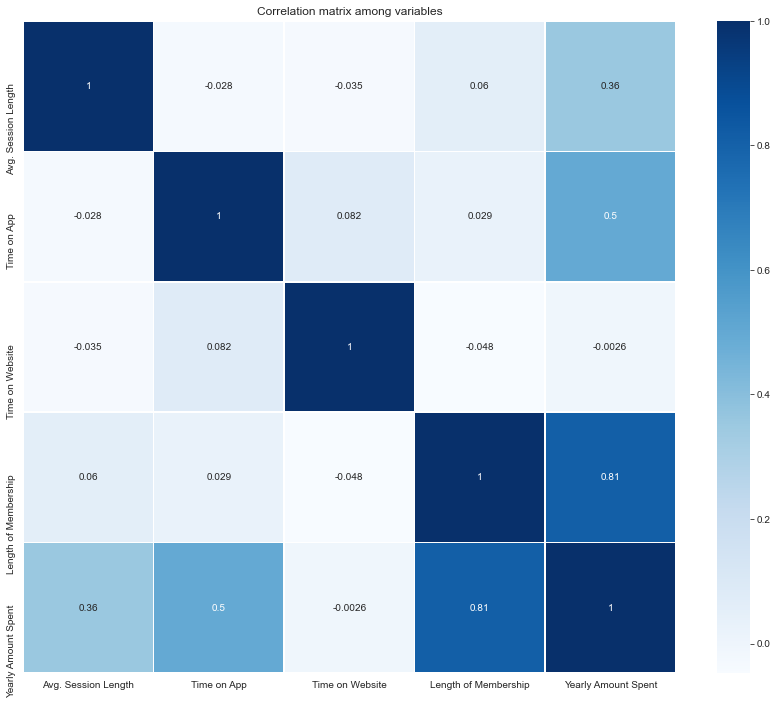

In [13]:
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(customers.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

### Creating the Independendent and Dependent Data Sets

In [14]:
y = customers['Yearly Amount Spent']

In [15]:
X = customers[['Avg. Session Length',
                'Time on App',
                'Time on Website',
                'Length of Membership']]

### Model Building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

### Prediction of the Model


In [19]:
y_pred = lm.predict( X_test)

In [20]:
y_pred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

### Plotting the results

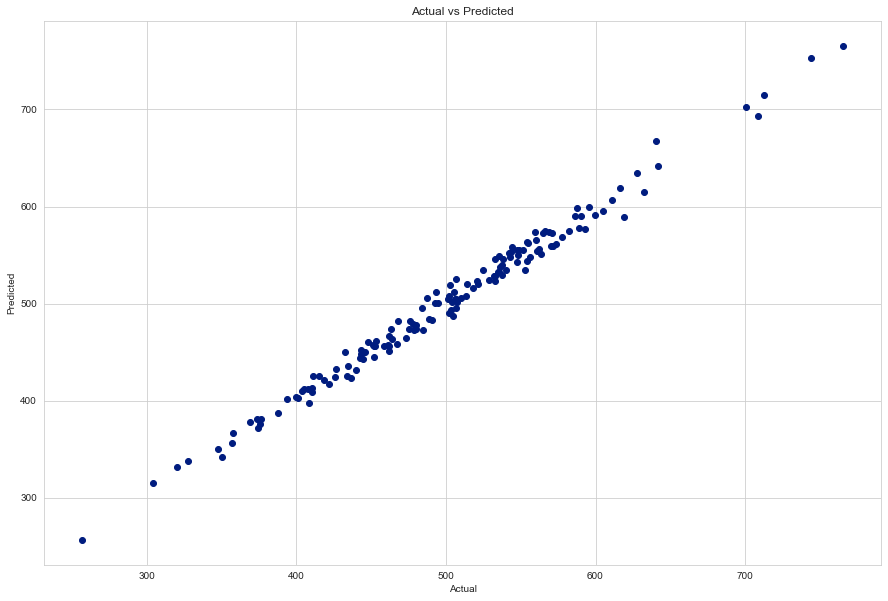

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [22]:
# Interpretation of actual, predicted and their difference 

In [23]:
y_pred_cust = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_pred, "Difference" : y_test - y_pred}) 

In [24]:
y_pred_cust.head(10)

,Actual value,Predicted value,Difference
18,452.315675,456.441861,-4.126186
361,401.033135,402.720053,-1.686918
104,410.069611,409.253154,0.816457
4,599.406092,591.431034,7.975058
156,586.155870,590.014373,-3.858503
350,535.480775,548.823966,-13.343191
32,588.712606,577.597380,11.115226
205,712.396327,715.444281,-3.047954
81,462.897636,473.789345,-10.891708
414,532.724805,545.921136,-13.196331


In [25]:
# r-square score on train data
lm.score(X_train,y_train)

0.9817562058732432

In [26]:
# r-square score on test data
lm.score(X_test,y_test)

0.9890046246741234

In [27]:
from sklearn import metrics

In [28]:
#All of these are loss functions, because we want to minimize them.

In [29]:
#Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 7.228148653430835


In [30]:
#Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 79.81305165097443


In [31]:
#Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 8.933815066978633


In [32]:
## r-square score on test data
print('Rsq.:', metrics.r2_score(y_test, y_pred))

Rsq.: 0.9890046246741234


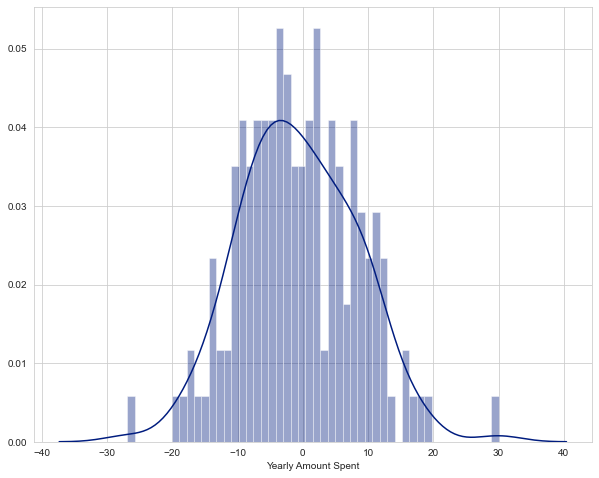

In [33]:
# Now we can see the normally distributed graph 
plt.figure(figsize=(10,8))
sns.distplot((y_test-y_pred),bins=50)
plt.show()

### Model Statistics

In [34]:
import statsmodels.api as sm

In [35]:
#Adding Intercept term to the model
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [36]:
#Converting into Dataframe
X_train_d=pd.DataFrame(X_train)

In [37]:
#Printing the Model Statistics
model_train = sm.OLS(y_train,X_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     4641.
Date:                 Thu, 30 Sep 2021   Prob (F-statistic):          1.88e-298
Time:                         21:02:25   Log-Likelihood:                -1314.1
No. Observations:                  350   AIC:                             2638.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1047.9328     28.509    -36.758      0.000   -1104.007    -991.859
Avg. Session Length     25.9815      0.557     46.657      0.000      24.886      27.077
Time on App             38.5902      0.590     65.411      0.000      37.430      39.751
Time on Website          0.1904      0.576      0.330      0.741      -0.943       1.324
Length of Membership    61.2791      0.568    107.923      0.000      60.162      62.396
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.505
Skew:                          -0.092   Prob(JB):                        0.777
Kurtosis:                       2.977   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model_test= sm.OLS(y_test,X_test).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.989
Model:                             OLS   Adj. R-squared:                  0.989
Method:                  Least Squares   F-statistic:                     3378.
Date:                 Thu, 30 Sep 2021   Prob (F-statistic):          5.56e-142
Time:                         21:02:25   Log-Likelihood:                -538.69
No. Observations:                  150   AIC:                             1087.
Df Residuals:                      145   BIC:                             1102.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1049.9291     38.777    -27.076      0.000   -1126.571    -973.287
Avg. Session Length     25.1146      0.774     32.431      0.000      23.584      26.645
Time on App             39.0222      0.674     57.894      0.000      37.690      40.354
Time on Website          0.7671      0.679      1.130      0.260      -0.575       2.109
Length of Membership    62.2473      0.712     87.405      0.000      60.840      63.655
==============================================================================
Omnibus:                        2.442   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.015
Skew:                           0.183   Prob(JB):                        0.365
Kurtosis:                       3.434   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Checking the VIF Values

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

,VIF Factor,features
0,2624.3,const
1,1.0,Avg. Session Length
2,1.0,Time on App
3,1.0,Time on Website
4,1.0,Length of Membership


In [42]:
#Storing Coefficients in DataFrame along with coloumn names
coefficients = pd.concat([pd.DataFrame(X_train_d.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [43]:
coefficients

,0,0
0,const,25.981550
1,Avg. Session Length,38.590159
2,Time on App,0.190405
3,Time on Website,61.279097
4,Length of Membership,NaN


In [44]:
# regression intercept
print('Intercept:' ,lm.intercept_)

Intercept: -1047.9327822502385


## Conclusion:

1 unit increase in avg Session length is associate with $26 more spent

1 unit increase time on App is associate with $38.5 more spent

1 unit increase time on Website is associate with $0.6 more spent

1 unit increase length of membership is associate with $61 more spent

############################################ CASE STUDY ##########################################################